
### The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').


In [2]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


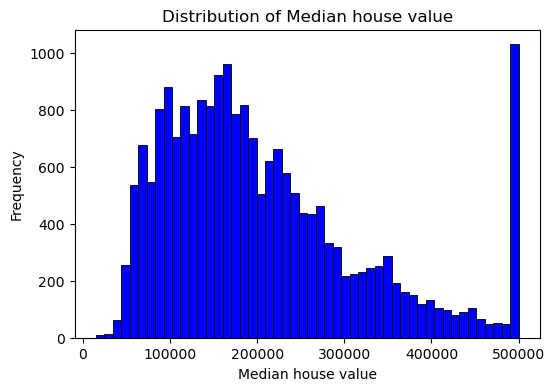

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df['median_house_value'], bins=50, color='blue', alpha = 1 )
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of Median house value')

plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


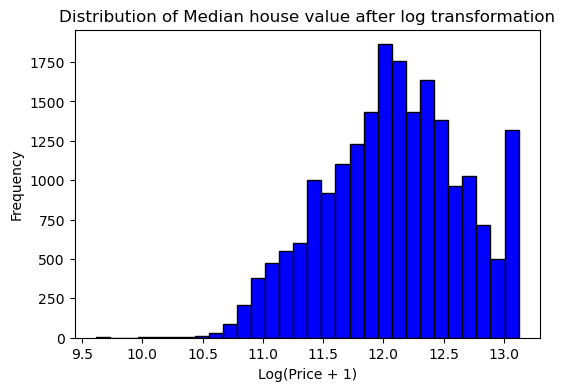

In [12]:
log_price = np.log1p(df['median_house_value'])

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=30, color='blue', alpha = 1 )
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of Median house value after log transformation')

plt.show()

In [10]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [13]:
filters = ['<1H OCEAN','INLAND']
df_num = df[df['ocean_proximity'].isin(filters)][base]

df_num

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### 
Question 1

There's one feature with missing values. What is it?

total_rooms
total_bedrooms
population
households



###

In [16]:
df_num.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2: What's the median (50% percentile) for variable 'population'?


In [18]:
df_num['population'].median()

1195.0

### Prepare and split the dataset

In [19]:
np.random.seed(42)

n = len(df_num)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_num.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [21]:
print("Training Set:", len(df_train))
print("Validation Set:",  len(df_val))
print("Test Set:", len(df_test))


Training Set: 9413
Validation Set: 3137
Test Set: 3137


In [22]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [25]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [47]:
total_bedroom_mean = df_train['total_bedrooms'].mean()
total_bedroom_mean

542.552956325786

In [48]:
def prepare_X(df, v):
    df_x = df.copy()
    df_x = df_x.fillna(v)
    X = df_x.values
    return X

In [44]:
def prepare_X_mean(df):
    df_x = df.copy()
    df_x = df_x['total_bedroom'].fillna(df_x['total_bedroom'].mean())
    X = df_x.values
    return X

### Linear Regression 

In [80]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [50]:
X_train = prepare_X(df_train, 0)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse_Train_fillna0 = rmse(y_train, y_pred)


In [51]:
X_val = prepare_X(df_val, 0)
y_pred_val = w_0 + X_val.dot(w)

rmse_Val_fillna0 = rmse(y_val, y_pred_val)

In [57]:
round(rmse_Val_fillna0,2)

0.34

### Training and Validation when using fillna = mean

In [53]:
X_train = prepare_X(df_train, v = total_bedroom_mean)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse_Train_fillnamean = rmse(y_train, y_pred)

In [54]:
X_val = prepare_X(df_val, v = total_bedroom_mean)
y_pred_val = w_0 + X_val.dot(w)

rmse_Val_fillnamean = rmse(y_val, y_pred_val)

In [84]:
print("RMSE while using mean to fillna:", round(rmse_Val_fillnamean,2))

RMSE while using mean to fillna: 0.34


### Question 4: 
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

0
0.000001
0.001
0.0001 

In [71]:
def train_linear_regression_w_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [63]:
X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_w_reg(X_train, y_train, r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))



     0 0.34
 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.35
    10 0.35


In [75]:
def train_val_test_split(df, s):
    np.random.seed(s)

    n = len(df_num)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_num.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [64]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [81]:
rmse_list = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, s)
    X_train = prepare_X(df_train, 0)
    X_val = prepare_X(df_val, 0)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    rmse_list.append(rmse(y_val, y_pred)) 
    # print('%6s' %r, round(rmse(y_val, y_pred),2))

In [82]:
rmse_list

[0.33773871600539185,
 0.3377999353671794,
 0.3384287006766662,
 0.33200494683073895,
 0.3394451862558107,
 0.34338197052488156,
 0.3385330211774675,
 0.34687476972828224,
 0.35127368659519287,
 0.3341558266507949]

In [83]:
round(np.std(rmse_list),3)

0.005

Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.13
0.23
0.33
0.43

In [79]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, 9)

print(len(df_train))
print(len(df_val))
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

print(len(df_full_train))
y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train, 0)
X_test = prepare_X(df_test, 0)

w_0, w = train_linear_regression_w_reg(X_full_train, y_full_train, r = 0.001)

y_pred_train = w_0 + X_full_train.dot(w)
y_pred_test = w_0 +  X_test.dot(w)

print("Train RMSE:", rmse(y_full_train, y_pred_train))
print("Test RMSE:", rmse(y_test, y_pred_test))

9413
3137
12550
Train RMSE: 0.33931756759096154
Test RMSE: 0.3349899336610803
